In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt2
import seaborn as sns
from sklearn import tree
import graphviz
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from ggplot import *
import pydotplus

In [3]:
# Import df

mp  = pd.read_csv('/Users/Felicia/Documents/Felicia Zhang/Felicia/Princeton/ConsultingClub/Mindprint/Mindprint_ScaledScores_YesCombo.csv')
mp.set_index('customer_id', inplace=True)
len(mp)-len(mp.dropna()) #NA = 5 rows

5

In [4]:
mp = mp.dropna()
mp.head()

,first_name,last_name,completed_at,family_id,age,SM_Sz,SM_SCORE,VMEM_Az,VMEM_Sz,VMEM_efficiency,...,DEPRESSION,ACTversion,EngRaw,MathRaw,ReadingRaw,ScienceRaw,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore
customer_id,,,,,,,,,,,,,,,,,,,,,
512,Joan,Shavel,2015-09-01 14:21,143,15,1.0190,medium_strength,0.6298,0.3895,0.50965,...,0,Combo,56,33.0,54.0,46.0,18,16.0,21.0,19.0
512,Joan,Shavel,2015-09-01 14:21,143,15,1.0190,medium_strength,0.6298,0.3895,0.50965,...,0,70G,67,44.0,36.0,26.0,29,26.0,31.0,24.0
513,Olivia,Howson,2015-09-01 14:54,143,16,0.7039,high_expected,0.9644,1.1184,1.04140,...,0,71E,59,36.0,29.0,15.0,26,23.0,25.0,18.0
517,Dana,Ladd,2015-09-02 14:03,143,17,1.7537,high_strength,0.6250,1.0837,0.85435,...,0,71A,70,44.0,35.0,27.0,32,27.0,31.0,24.0
677,Gianna,Salituri,2015-11-03 0:15,143,16,0.6158,high_expected,-0.0539,0.6653,0.30570,...,0,71C,51,23.0,30.0,18.0,22,17.0,27.0,19.0


In [14]:
# Calculate descriptive statistics

mp.describe().round(1)

,family_id,age,SM_Sz,VMEM_Az,VMEM_Sz,VMEM_efficiency,ABF_Az,ABF_Sz,ABF_efficiency,LAN_Az,...,ANXIETY,DEPRESSION,EngRaw,MathRaw,ReadingRaw,ScienceRaw,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore
count,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,...,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0
mean,184.5,16.2,0.7,0.2,0.3,0.3,0.1,0.4,0.3,0.5,...,0.3,0.1,57.3,40.2,32.7,30.7,23.7,23.3,23.4,22.7
std,139.2,0.8,0.6,0.7,0.6,0.5,1.2,0.9,0.8,0.5,...,0.6,0.4,12.9,11.4,16.4,16.1,5.1,4.7,5.0,3.8
min,143.0,14.0,-1.7,-2.9,-1.4,-1.6,-3.9,-3.7,-3.2,-1.0,...,0.0,0.0,24.0,14.0,8.0,6.0,10.0,15.0,9.0,10.0
25%,143.0,16.0,0.4,-0.1,-0.1,-0.1,-0.4,0.1,0.0,0.2,...,0.0,0.0,49.0,34.0,23.0,21.0,21.0,19.0,20.0,20.0
50%,143.0,16.0,0.8,0.6,0.4,0.4,0.3,0.6,0.4,0.6,...,0.0,0.0,57.0,40.0,27.0,26.0,24.0,24.0,23.0,23.0
75%,179.0,17.0,1.1,0.6,0.7,0.7,0.9,0.9,0.8,1.0,...,0.0,0.0,65.0,46.0,35.0,32.0,27.0,27.0,27.0,25.0
max,887.0,21.0,1.9,1.0,1.4,1.2,2.5,2.6,1.8,1.1,...,2.0,2.0,95.0,87.0,96.0,100.0,35.0,35.0,34.0,36.0


In [15]:
# Only want the scaled subject scores

scores = mp.iloc[:,[-4,-3,-2,-1]]
scores['TotalScore'] = scores.mean(axis=1).astype(int)
scores.head()

/Users/Felicia/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore,TotalScore
customer_id,,,,,
512,18,16.0,21.0,19.0,18
512,29,26.0,31.0,24.0,27
513,26,23.0,25.0,18.0,23
517,32,27.0,31.0,24.0,28
677,22,17.0,27.0,19.0,21


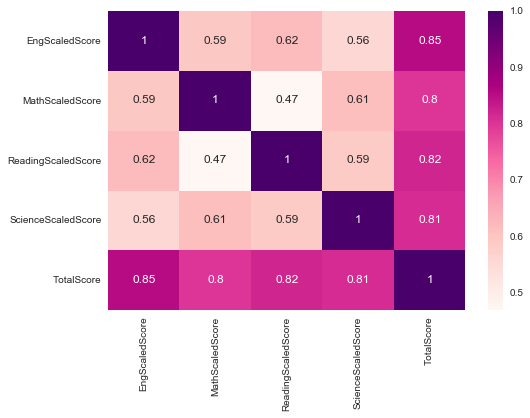

In [16]:
# Heatmap

fig = sns.heatmap(scores.corr(),annot=True, cmap='RdPu')
plt2.show()

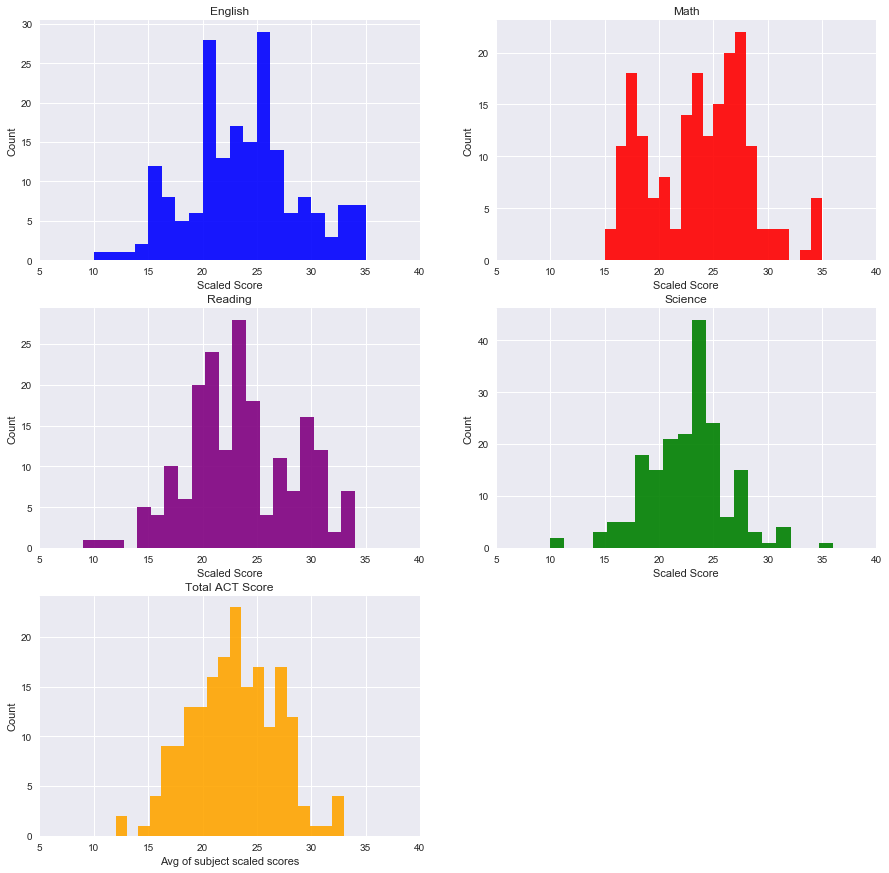

In [17]:
# Plot distribution of subject scores
num_bins = 20

fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(321)
ax2 = fig1.add_subplot(322)
ax3 = fig1.add_subplot(323)
ax4 = fig1.add_subplot(324)
ax5 = fig1.add_subplot(325)

x = scores.loc[:,'EngScaledScore']
n, bins, patches = ax1.hist(x, num_bins, facecolor='blue', alpha=0.9)
ax1.set_title("English")
ax1.set_ylabel("Count")
ax1.set_xlabel("Scaled Score")
ax1.set_xlim(5,40,5)

x = scores.loc[:,'MathScaledScore']
n, bins, patches = ax2.hist(x, num_bins, facecolor='red', alpha=0.9)
ax2.set_title("Math")
ax2.set_ylabel("Count")
ax2.set_xlabel("Scaled Score")
ax2.set_xlim(5,40,5)

x = scores.loc[:,'ReadingScaledScore']
n, bins, patches = ax3.hist(x, num_bins, facecolor='purple', alpha=0.9)
ax3.set_title("Reading")
ax3.set_ylabel("Count")
ax3.set_xlabel("Scaled Score")
ax3.set_xlim(5,40,5)

x = scores.loc[:,'ScienceScaledScore']
n, bins, patches = ax4.hist(x, num_bins, facecolor='green', alpha=0.9)
ax4.set_title("Science")
ax4.set_ylabel("Count")
ax4.set_xlabel("Scaled Score")
ax4.set_xlim(5,40,5)

x = scores.loc[:,'TotalScore']
n, bins, patches = ax5.hist(x, num_bins, facecolor='orange', alpha=0.9)
ax5.set_title("Total ACT Score")
ax5.set_ylabel("Count")
ax5.set_xlabel("Avg of subject scaled scores")
ax5.set_xlim(5,40,5)

plt.show()

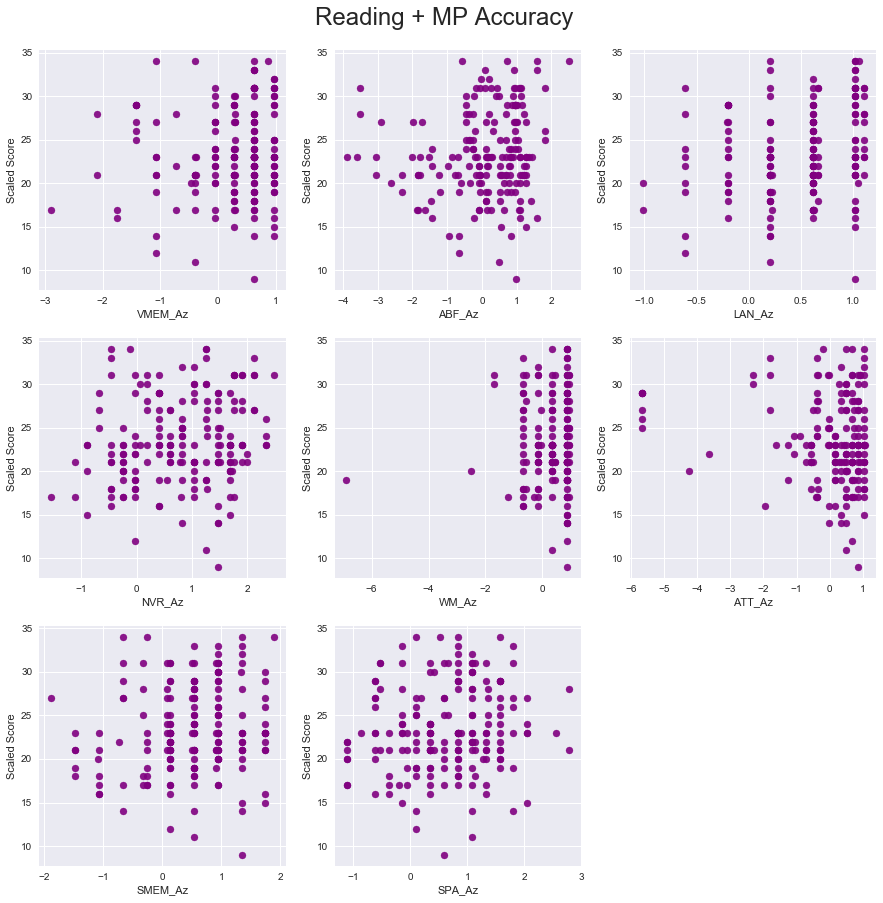

In [18]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# READING + ACCURACY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Reading + MP Accuracy', fontsize=24, y=0.92)
y = mp.loc[:,'ReadingScaledScore']

x = mp.loc[:,'VMEM_Az']
ax1.scatter(x, y, c='purple', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_Az")

x = mp.loc[:,'ABF_Az']
ax2.scatter(x, y, c='purple', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_Az")

x = mp.loc[:,'LAN_Az']
ax3.scatter(x, y, c='purple', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_Az")

x = mp.loc[:,'NVR_Az']
ax4.scatter(x, y, c='purple', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_Az")

x = mp.loc[:,'WM_Az']
ax5.scatter(x, y, c='purple', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_Az")

x = mp.loc[:,'ATT_Az']
ax6.scatter(x, y, c='purple', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_Az")

x = mp.loc[:,'SMEM_Az']
ax7.scatter(x, y, c='purple', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_Az")

x = mp.loc[:,'SPA_Az']
ax8.scatter(x, y, c='purple', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_Az")
plt.show()

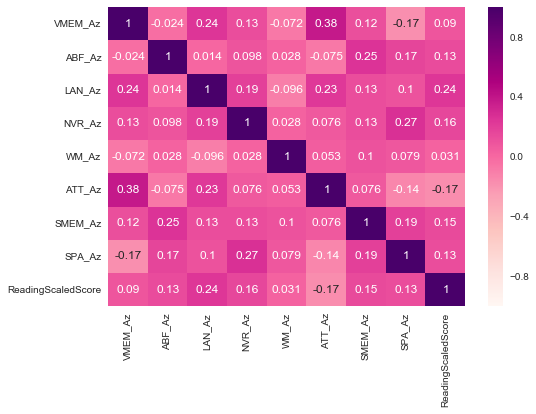

In [19]:
foo2 = mp.loc[:, mp.columns.str.contains('_Az|ReadingScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

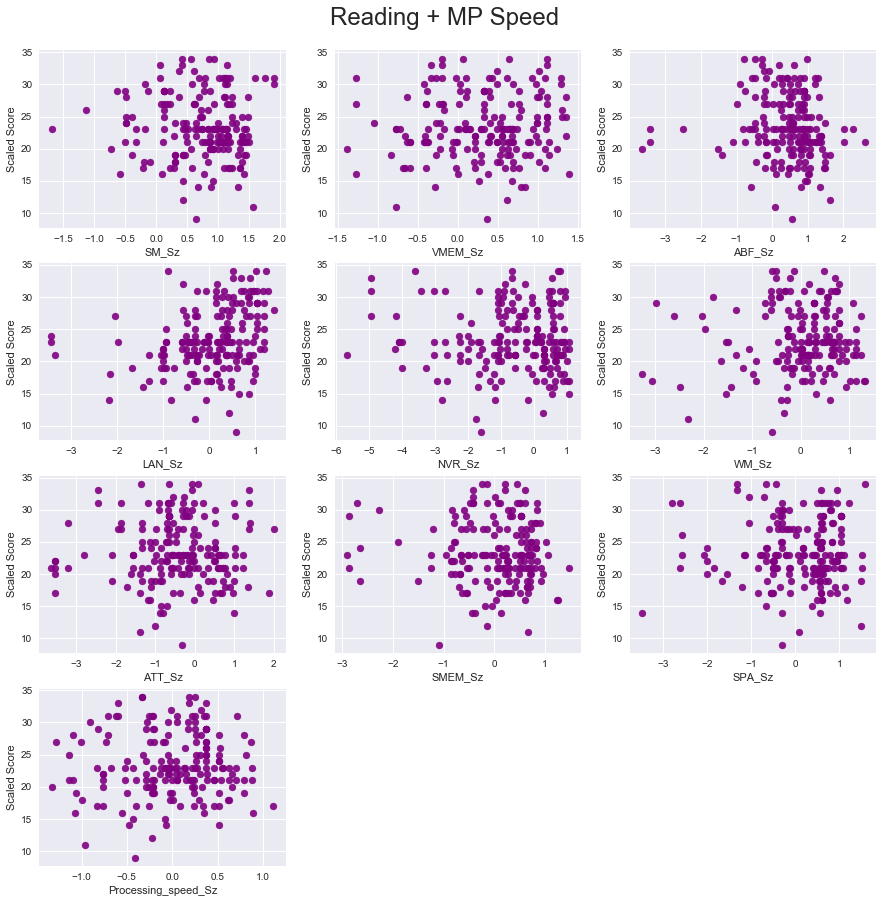

In [20]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# READING + SPEED
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(4,3,1)
ax2 = fig1.add_subplot(4,3,2)
ax3 = fig1.add_subplot(4,3,3)
ax4 = fig1.add_subplot(4,3,4)
ax5 = fig1.add_subplot(4,3,5)
ax6 = fig1.add_subplot(4,3,6)
ax7 = fig1.add_subplot(4,3,7)
ax8 = fig1.add_subplot(4,3,8)
ax9 = fig1.add_subplot(4,3,9)
ax10 = fig1.add_subplot(4,3,10)

fig1.suptitle('Reading + MP Speed', fontsize=24, y=0.92)
y = mp.loc[:,'ReadingScaledScore']

x = mp.loc[:,'SM_Sz']
ax1.scatter(x, y, c='purple', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("SM_Sz")

x = mp.loc[:,'VMEM_Sz']
ax2.scatter(x, y, c='purple', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("VMEM_Sz")

x = mp.loc[:,'ABF_Sz']
ax3.scatter(x, y, c='purple', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("ABF_Sz")

x = mp.loc[:,'LAN_Sz']
ax4.scatter(x, y, c='purple', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("LAN_Sz")

x = mp.loc[:,'NVR_Sz']
ax5.scatter(x, y, c='purple', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("NVR_Sz")

x = mp.loc[:,'WM_Sz']
ax6.scatter(x, y, c='purple', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("WM_Sz")

x = mp.loc[:,'ATT_Sz']
ax7.scatter(x, y, c='purple', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("ATT_Sz")

x = mp.loc[:,'SMEM_Sz']
ax8.scatter(x, y, c='purple', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SMEM_Sz")

x = mp.loc[:,'SPA_Sz']
ax9.scatter(x, y, c='purple', alpha=0.9)
ax9.set_ylabel("Scaled Score")
ax9.set_xlabel("SPA_Sz")

x = mp.loc[:,'PROCESSING_SPEED_Sz']
ax10.scatter(x, y, c='purple', alpha=0.9)
ax10.set_ylabel("Scaled Score")
ax10.set_xlabel("Processing_speed_Sz")

plt.show()

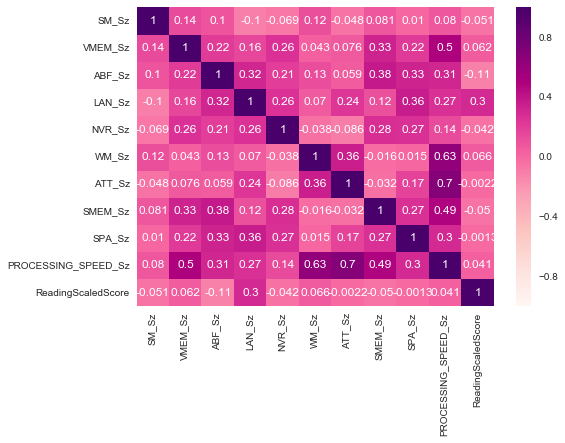

In [21]:
foo2 = mp.loc[:, mp.columns.str.contains('_Sz|ReadingScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

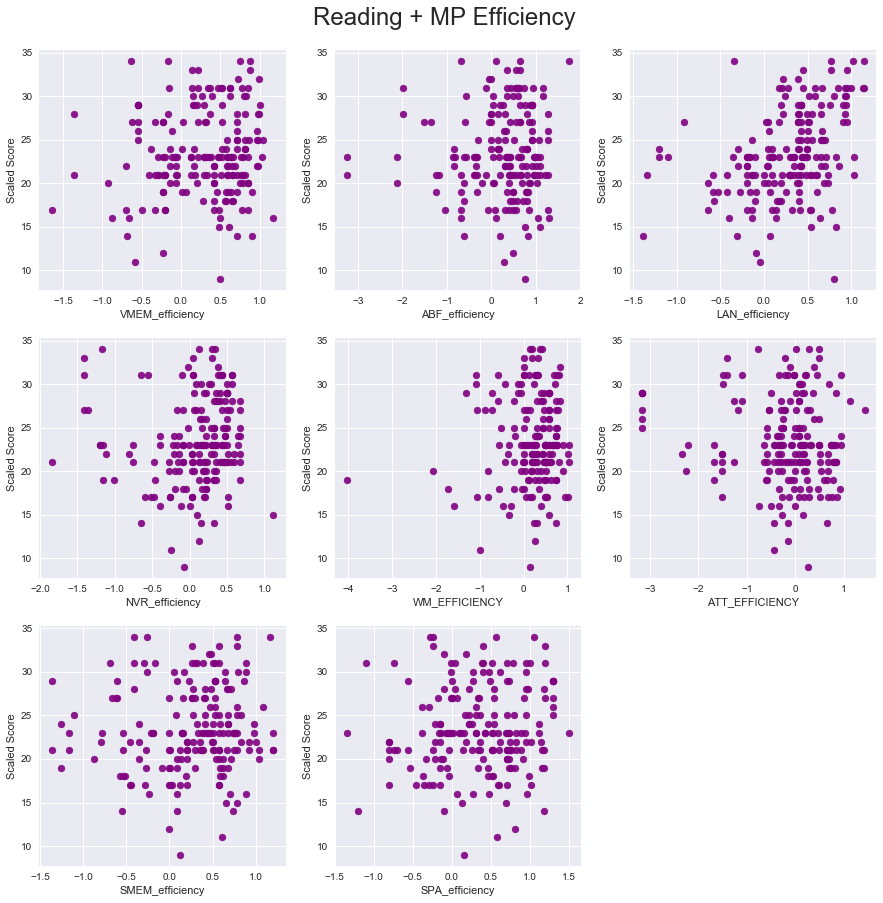

In [22]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# READING + EFFICIENCY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Reading + MP Efficiency', fontsize=24, y=0.92)
y = mp.loc[:,'ReadingScaledScore']

x = mp.loc[:,'VMEM_efficiency']
ax1.scatter(x, y, c='purple', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_efficiency")

x = mp.loc[:,'ABF_efficiency']
ax2.scatter(x, y, c='purple', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_efficiency")

x = mp.loc[:,'LAN_efficiency']
ax3.scatter(x, y, c='purple', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_efficiency")

x = mp.loc[:,'NVR_efficiency']
ax4.scatter(x, y, c='purple', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_efficiency")

x = mp.loc[:,'WM_EFFICIENCY']
ax5.scatter(x, y, c='purple', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_EFFICIENCY")

x = mp.loc[:,'ATT_EFFICIENCY']
ax6.scatter(x, y, c='purple', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_EFFICIENCY")

x = mp.loc[:,'SMEM_efficiency']
ax7.scatter(x, y, c='purple', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_efficiency")

x = mp.loc[:,'SPA_efficiency']
ax8.scatter(x, y, c='purple', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_efficiency")


plt.show()

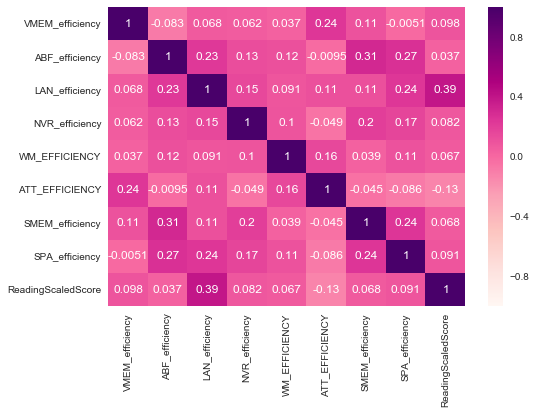

In [23]:
foo2 = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency|ReadingScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

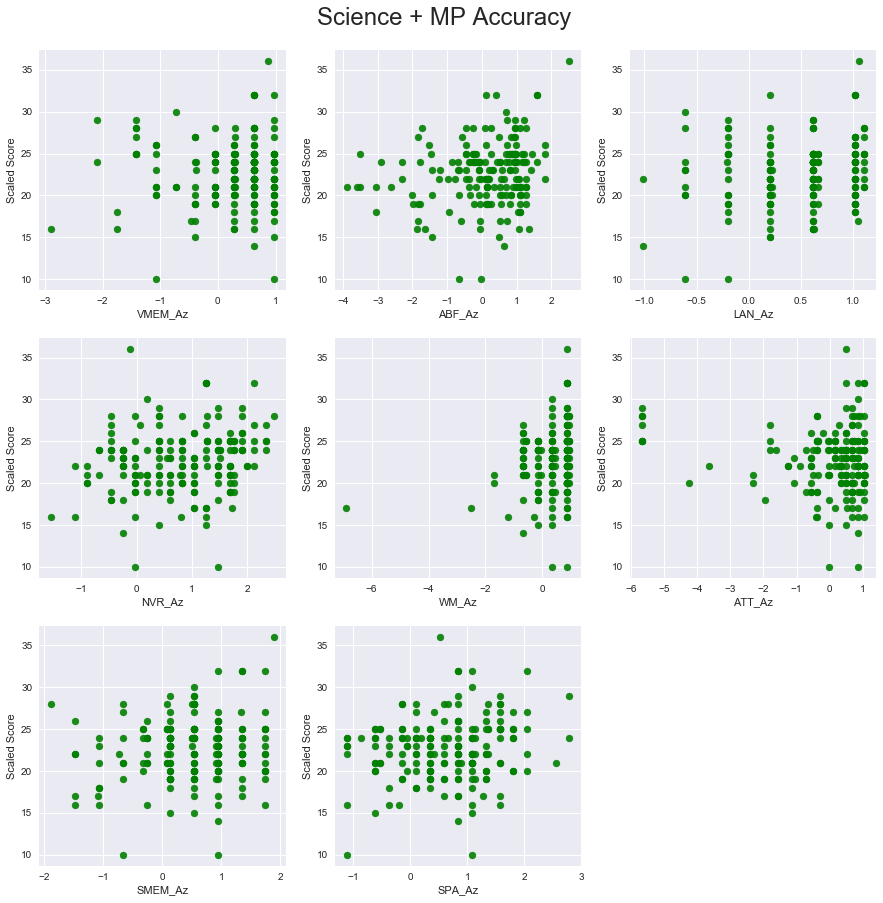

In [24]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# SCIENCE + ACCURACY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Science + MP Accuracy', fontsize=24, y=0.92)
y = mp.loc[:,'ScienceScaledScore']

x = mp.loc[:,'VMEM_Az']
ax1.scatter(x, y, c='green', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_Az")

x = mp.loc[:,'ABF_Az']
ax2.scatter(x, y, c='green', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_Az")

x = mp.loc[:,'LAN_Az']
ax3.scatter(x, y, c='green', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_Az")

x = mp.loc[:,'NVR_Az']
ax4.scatter(x, y, c='green', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_Az")

x = mp.loc[:,'WM_Az']
ax5.scatter(x, y, c='green', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_Az")

x = mp.loc[:,'ATT_Az']
ax6.scatter(x, y, c='green', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_Az")

x = mp.loc[:,'SMEM_Az']
ax7.scatter(x, y, c='green', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_Az")

x = mp.loc[:,'SPA_Az']
ax8.scatter(x, y, c='green', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_Az")
plt.show()

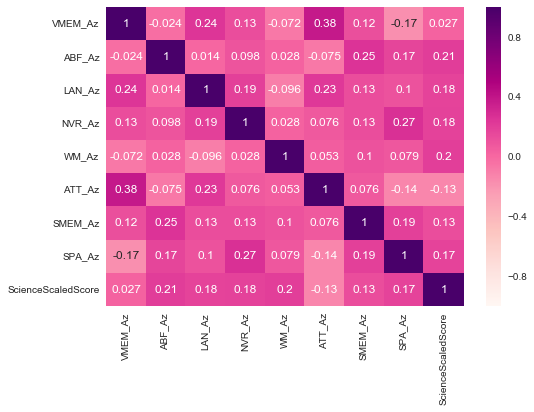

In [25]:
foo2 = mp.loc[:, mp.columns.str.contains('Az|ScienceScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

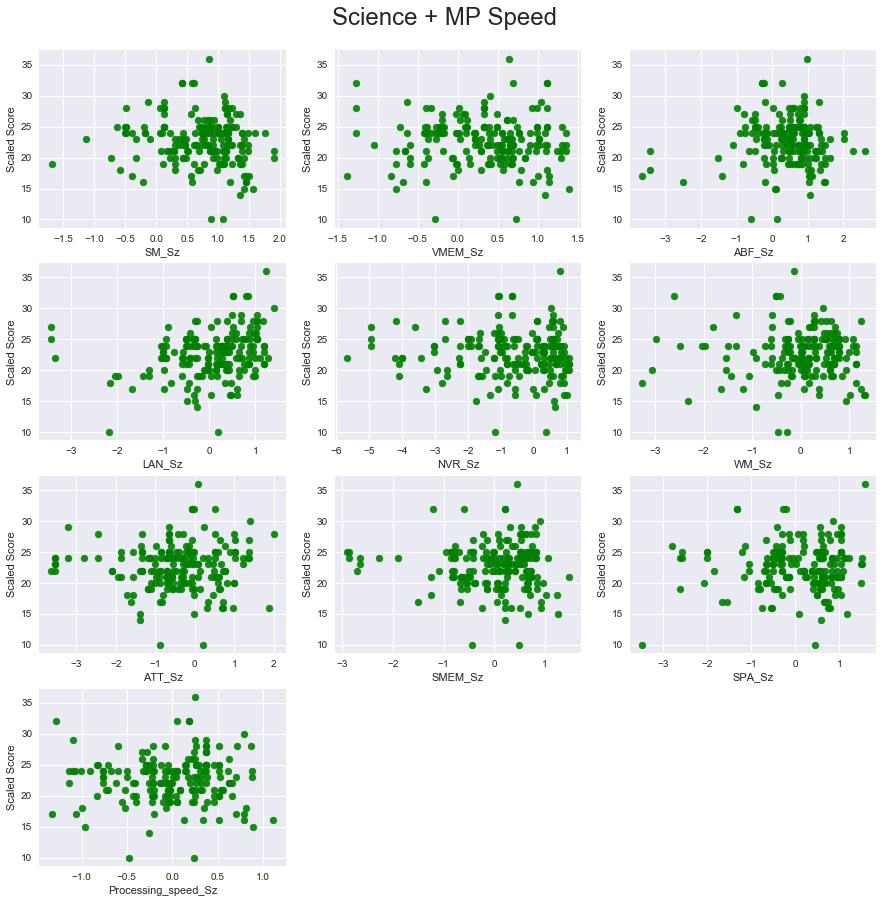

In [26]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# SCIENCE + SPEED
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(4,3,1)
ax2 = fig1.add_subplot(4,3,2)
ax3 = fig1.add_subplot(4,3,3)
ax4 = fig1.add_subplot(4,3,4)
ax5 = fig1.add_subplot(4,3,5)
ax6 = fig1.add_subplot(4,3,6)
ax7 = fig1.add_subplot(4,3,7)
ax8 = fig1.add_subplot(4,3,8)
ax9 = fig1.add_subplot(4,3,9)
ax10 = fig1.add_subplot(4,3,10)

fig1.suptitle('Science + MP Speed', fontsize=24, y=0.92)
y = mp.loc[:,'ScienceScaledScore']

x = mp.loc[:,'SM_Sz']
ax1.scatter(x, y, c='green', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("SM_Sz")

x = mp.loc[:,'VMEM_Sz']
ax2.scatter(x, y, c='green', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("VMEM_Sz")

x = mp.loc[:,'ABF_Sz']
ax3.scatter(x, y, c='green', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("ABF_Sz")

x = mp.loc[:,'LAN_Sz']
ax4.scatter(x, y, c='green', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("LAN_Sz")

x = mp.loc[:,'NVR_Sz']
ax5.scatter(x, y, c='green', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("NVR_Sz")

x = mp.loc[:,'WM_Sz']
ax6.scatter(x, y, c='green', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("WM_Sz")

x = mp.loc[:,'ATT_Sz']
ax7.scatter(x, y, c='green', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("ATT_Sz")

x = mp.loc[:,'SMEM_Sz']
ax8.scatter(x, y, c='green', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SMEM_Sz")

x = mp.loc[:,'SPA_Sz']
ax9.scatter(x, y, c='green', alpha=0.9)
ax9.set_ylabel("Scaled Score")
ax9.set_xlabel("SPA_Sz")

x = mp.loc[:,'PROCESSING_SPEED_Sz']
ax10.scatter(x, y, c='green', alpha=0.9)
ax10.set_ylabel("Scaled Score")
ax10.set_xlabel("Processing_speed_Sz")

plt.show()

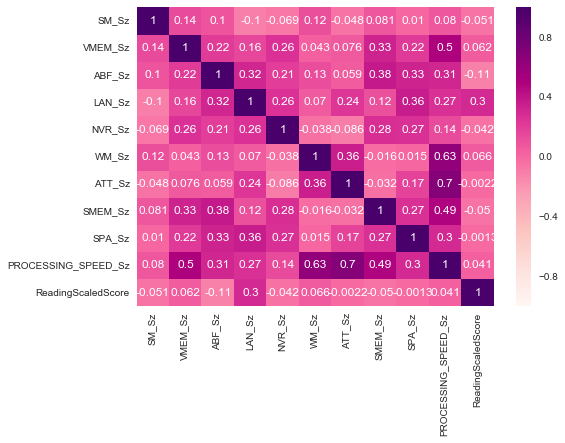

In [27]:
foo2 = mp.loc[:, mp.columns.str.contains('_Sz|ReadingScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

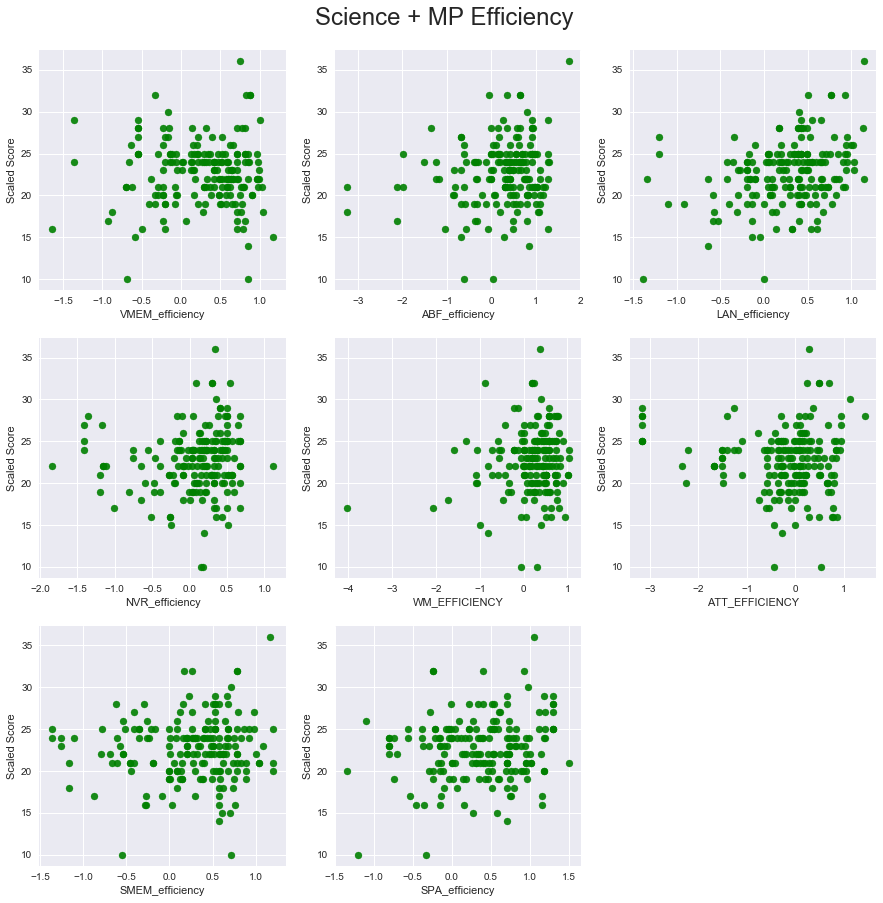

In [28]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# SCIENCE + EFFICIENCY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Science + MP Efficiency', fontsize=24, y=0.92)
y = mp.loc[:,'ScienceScaledScore']

x = mp.loc[:,'VMEM_efficiency']
ax1.scatter(x, y, c='green', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_efficiency")

x = mp.loc[:,'ABF_efficiency']
ax2.scatter(x, y, c='green', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_efficiency")

x = mp.loc[:,'LAN_efficiency']
ax3.scatter(x, y, c='green', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_efficiency")

x = mp.loc[:,'NVR_efficiency']
ax4.scatter(x, y, c='green', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_efficiency")

x = mp.loc[:,'WM_EFFICIENCY']
ax5.scatter(x, y, c='green', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_EFFICIENCY")

x = mp.loc[:,'ATT_EFFICIENCY']
ax6.scatter(x, y, c='green', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_EFFICIENCY")

x = mp.loc[:,'SMEM_efficiency']
ax7.scatter(x, y, c='green', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_efficiency")

x = mp.loc[:,'SPA_efficiency']
ax8.scatter(x, y, c='green', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_efficiency")


plt.show()

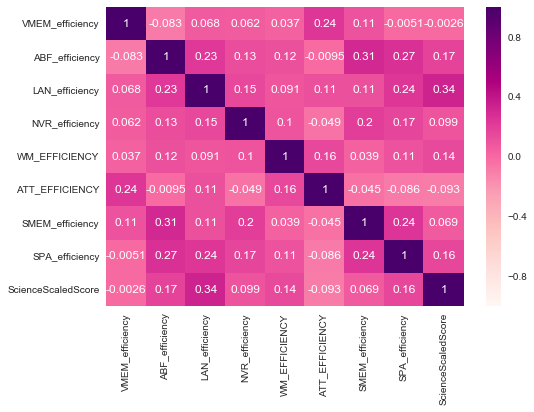

In [29]:
foo2 = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency|ScienceScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

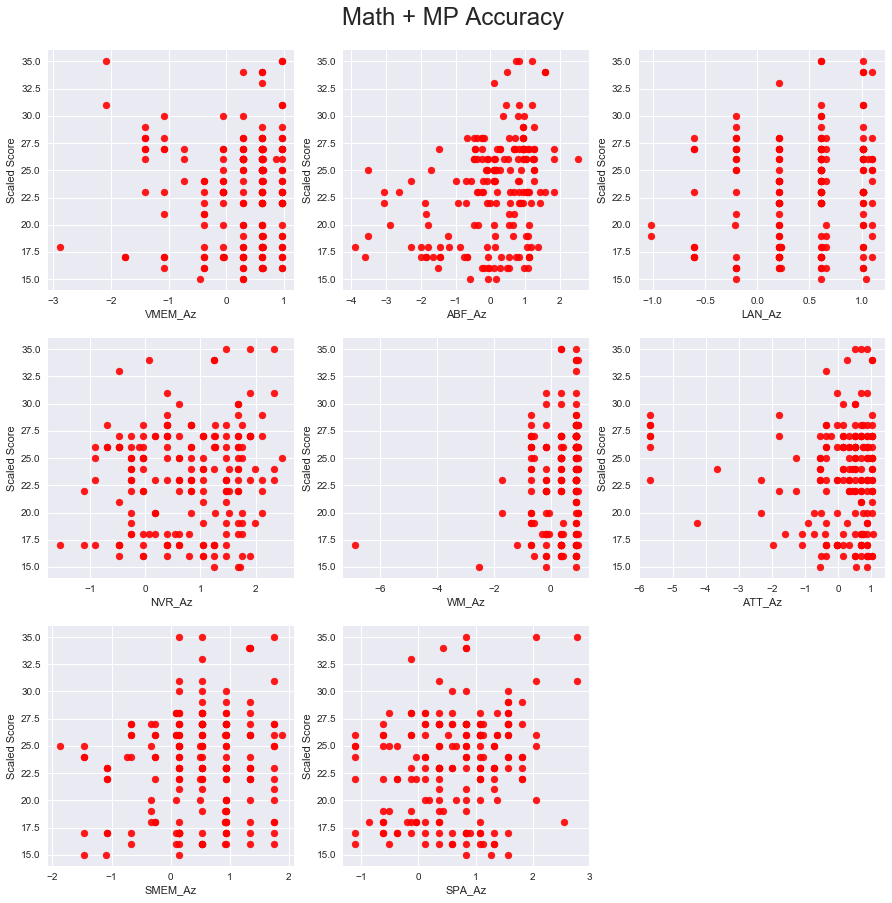

In [30]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# MATH + ACCURACY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Math + MP Accuracy', fontsize=24, y=0.92)
y = mp.loc[:,'MathScaledScore']

x = mp.loc[:,'VMEM_Az']
ax1.scatter(x, y, c='red', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_Az")

x = mp.loc[:,'ABF_Az']
ax2.scatter(x, y, c='red', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_Az")

x = mp.loc[:,'LAN_Az']
ax3.scatter(x, y, c='red', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_Az")

x = mp.loc[:,'NVR_Az']
ax4.scatter(x, y, c='red', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_Az")

x = mp.loc[:,'WM_Az']
ax5.scatter(x, y, c='red', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_Az")

x = mp.loc[:,'ATT_Az']
ax6.scatter(x, y, c='red', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_Az")

x = mp.loc[:,'SMEM_Az']
ax7.scatter(x, y, c='red', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_Az")

x = mp.loc[:,'SPA_Az']
ax8.scatter(x, y, c='red', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_Az")
plt.show()

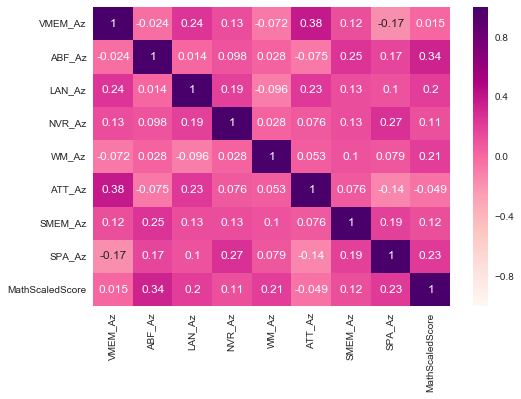

In [31]:
foo2 = mp.loc[:, mp.columns.str.contains('_Az|MathScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

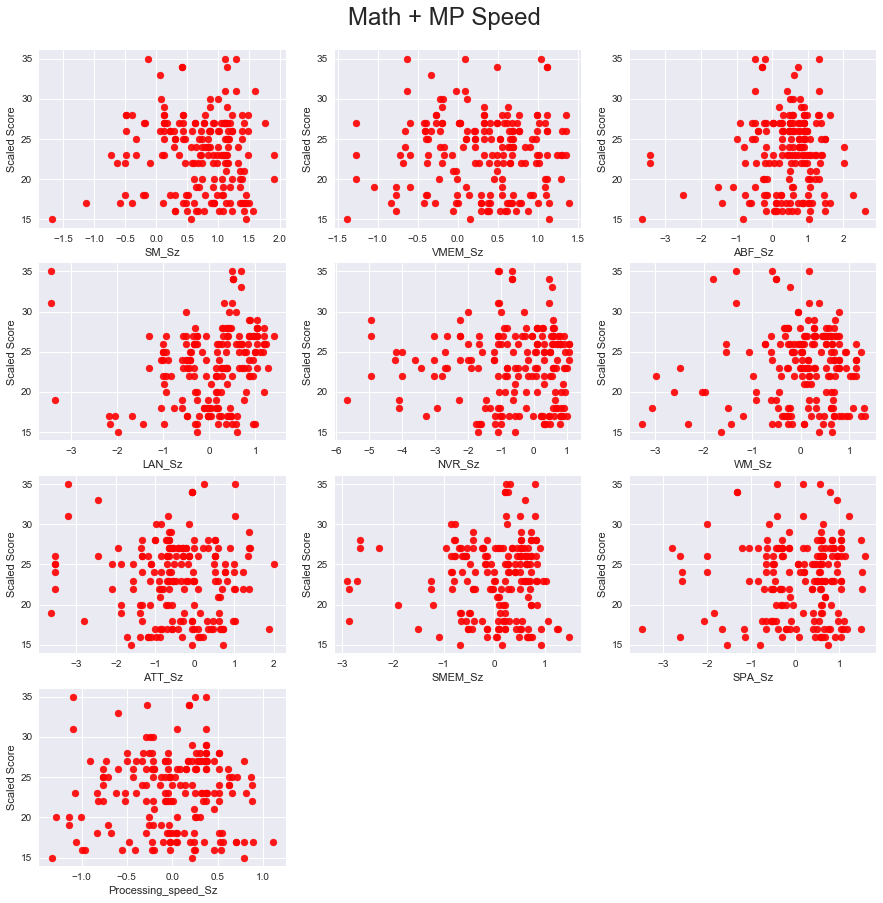

In [32]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# MATH + SPEED
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(4,3,1)
ax2 = fig1.add_subplot(4,3,2)
ax3 = fig1.add_subplot(4,3,3)
ax4 = fig1.add_subplot(4,3,4)
ax5 = fig1.add_subplot(4,3,5)
ax6 = fig1.add_subplot(4,3,6)
ax7 = fig1.add_subplot(4,3,7)
ax8 = fig1.add_subplot(4,3,8)
ax9 = fig1.add_subplot(4,3,9)
ax10 = fig1.add_subplot(4,3,10)

fig1.suptitle('Math + MP Speed', fontsize=24, y=0.92)
y = mp.loc[:,'MathScaledScore']

x = mp.loc[:,'SM_Sz']
ax1.scatter(x, y, c='red', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("SM_Sz")

x = mp.loc[:,'VMEM_Sz']
ax2.scatter(x, y, c='red', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("VMEM_Sz")

x = mp.loc[:,'ABF_Sz']
ax3.scatter(x, y, c='red', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("ABF_Sz")

x = mp.loc[:,'LAN_Sz']
ax4.scatter(x, y, c='red', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("LAN_Sz")

x = mp.loc[:,'NVR_Sz']
ax5.scatter(x, y, c='red', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("NVR_Sz")

x = mp.loc[:,'WM_Sz']
ax6.scatter(x, y, c='red', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("WM_Sz")

x = mp.loc[:,'ATT_Sz']
ax7.scatter(x, y, c='red', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("ATT_Sz")

x = mp.loc[:,'SMEM_Sz']
ax8.scatter(x, y, c='red', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SMEM_Sz")

x = mp.loc[:,'SPA_Sz']
ax9.scatter(x, y, c='red', alpha=0.9)
ax9.set_ylabel("Scaled Score")
ax9.set_xlabel("SPA_Sz")

x = mp.loc[:,'PROCESSING_SPEED_Sz']
ax10.scatter(x, y, c='red', alpha=0.9)
ax10.set_ylabel("Scaled Score")
ax10.set_xlabel("Processing_speed_Sz")

plt.show()

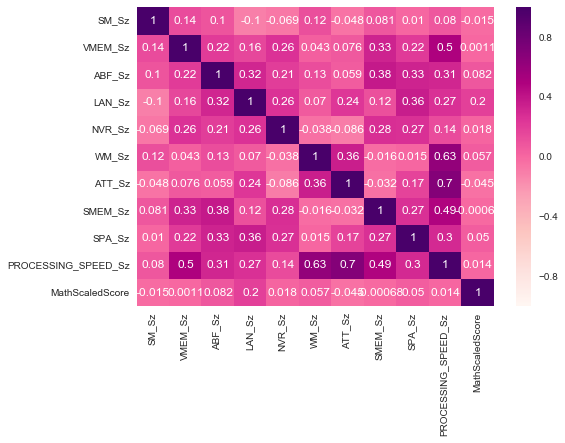

In [33]:
foo2 = mp.loc[:, mp.columns.str.contains('_Sz|MathScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

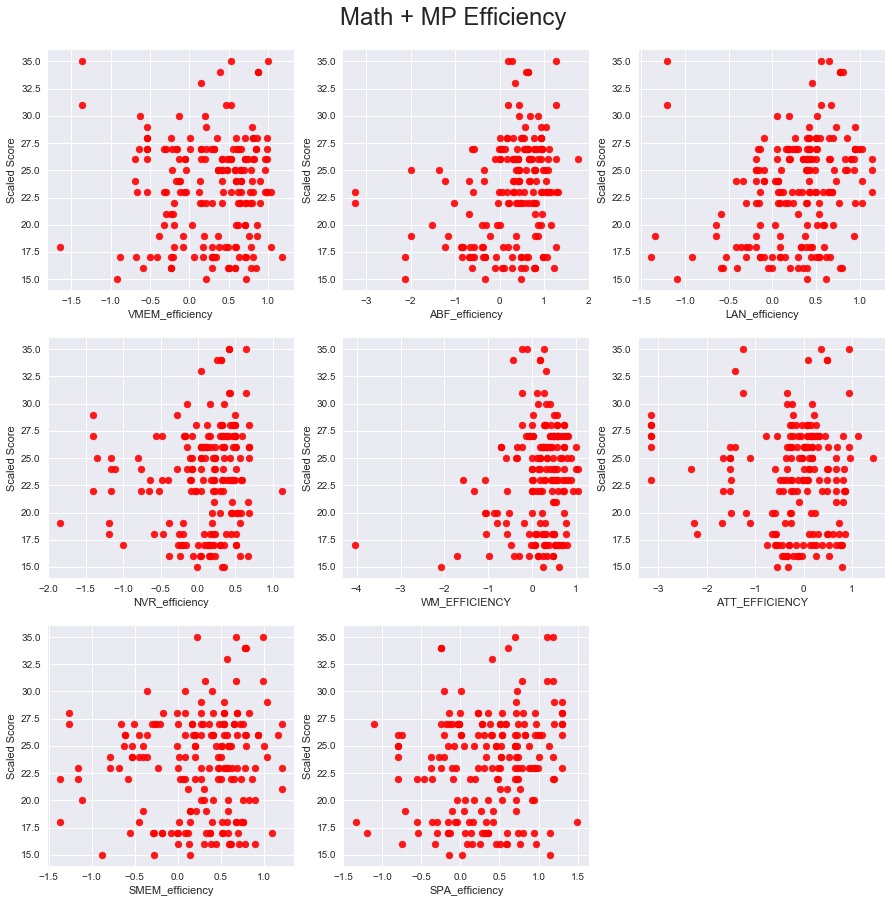

In [34]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# MATH + EFFICIENCY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Math + MP Efficiency', fontsize=24, y=0.92)
y = mp.loc[:,'MathScaledScore']

x = mp.loc[:,'VMEM_efficiency']
ax1.scatter(x, y, c='red', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_efficiency")

x = mp.loc[:,'ABF_efficiency']
ax2.scatter(x, y, c='red', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_efficiency")

x = mp.loc[:,'LAN_efficiency']
ax3.scatter(x, y, c='red', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_efficiency")

x = mp.loc[:,'NVR_efficiency']
ax4.scatter(x, y, c='red', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_efficiency")

x = mp.loc[:,'WM_EFFICIENCY']
ax5.scatter(x, y, c='red', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_EFFICIENCY")

x = mp.loc[:,'ATT_EFFICIENCY']
ax6.scatter(x, y, c='red', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_EFFICIENCY")

x = mp.loc[:,'SMEM_efficiency']
ax7.scatter(x, y, c='red', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_efficiency")

x = mp.loc[:,'SPA_efficiency']
ax8.scatter(x, y, c='red', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_efficiency")


plt.show()

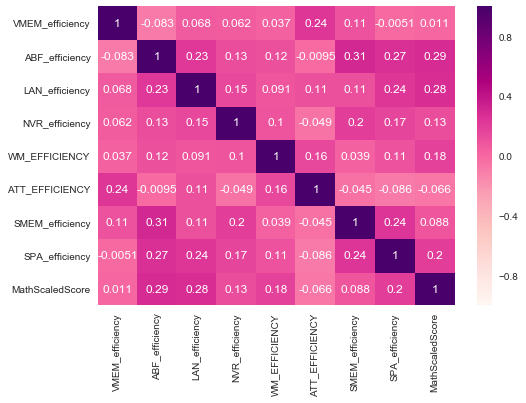

In [35]:
foo2 = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency|MathScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

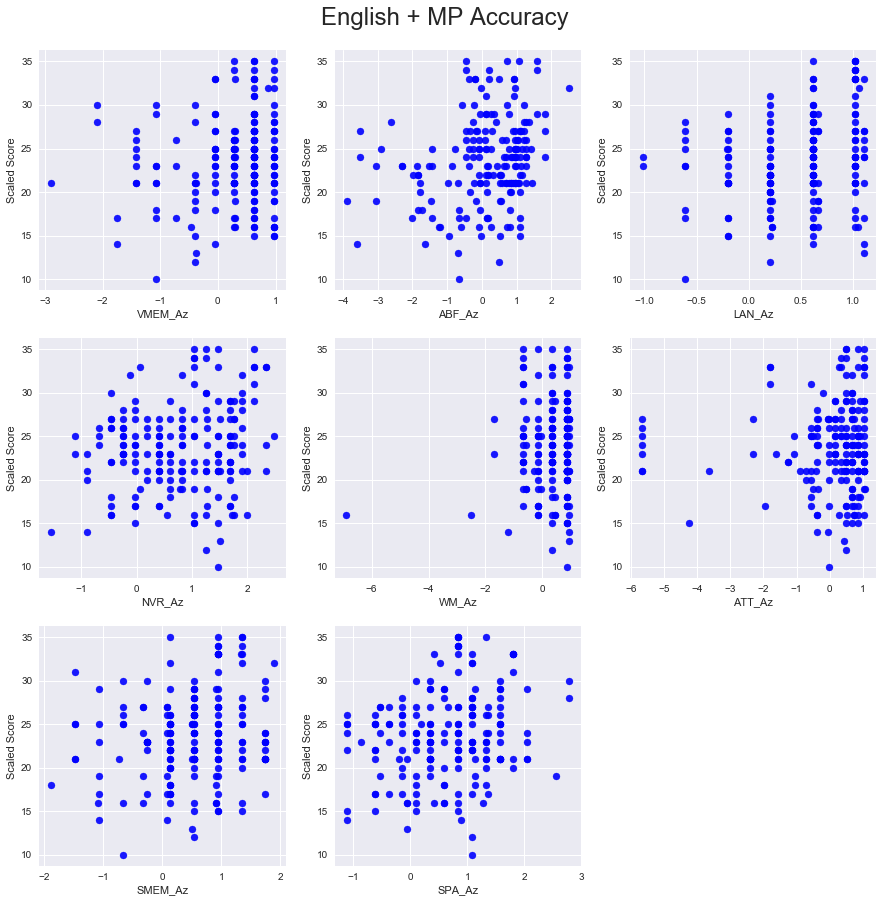

In [36]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# ENGLISH + ACCURACY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('English + MP Accuracy', fontsize=24, y=0.92)
y = mp.loc[:,'EngScaledScore']

x = mp.loc[:,'VMEM_Az']
ax1.scatter(x, y, c='blue', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_Az")

x = mp.loc[:,'ABF_Az']
ax2.scatter(x, y, c='blue', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_Az")

x = mp.loc[:,'LAN_Az']
ax3.scatter(x, y, c='blue', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_Az")

x = mp.loc[:,'NVR_Az']
ax4.scatter(x, y, c='blue', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_Az")

x = mp.loc[:,'WM_Az']
ax5.scatter(x, y, c='blue', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_Az")

x = mp.loc[:,'ATT_Az']
ax6.scatter(x, y, c='blue', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_Az")

x = mp.loc[:,'SMEM_Az']
ax7.scatter(x, y, c='blue', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_Az")

x = mp.loc[:,'SPA_Az']
ax8.scatter(x, y, c='blue', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_Az")
plt.show()

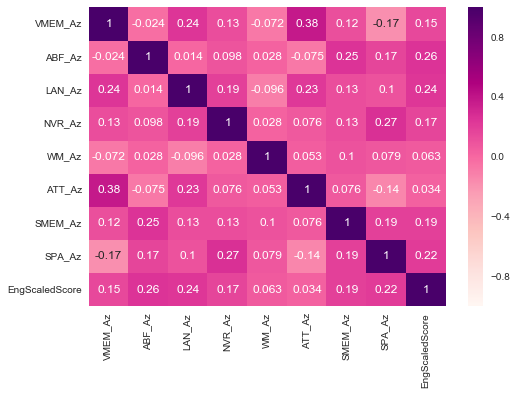

In [37]:
foo2 = mp.loc[:, mp.columns.str.contains('_Az|EngScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

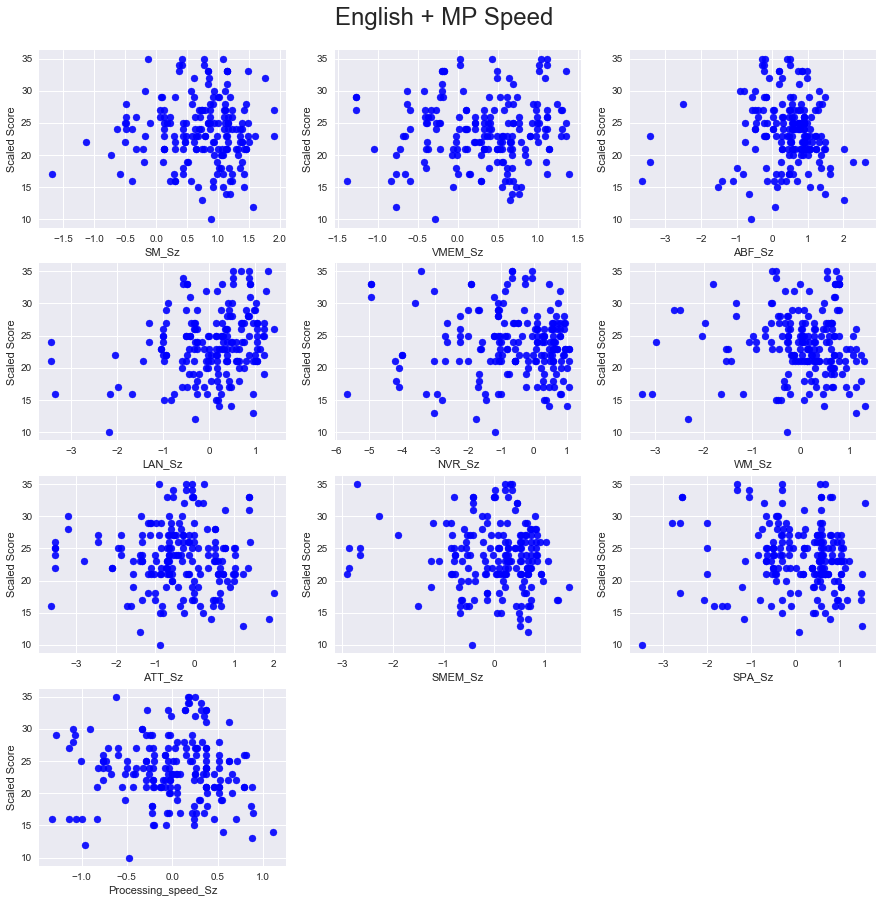

In [38]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# ENGLISH + SPEED
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(4,3,1)
ax2 = fig1.add_subplot(4,3,2)
ax3 = fig1.add_subplot(4,3,3)
ax4 = fig1.add_subplot(4,3,4)
ax5 = fig1.add_subplot(4,3,5)
ax6 = fig1.add_subplot(4,3,6)
ax7 = fig1.add_subplot(4,3,7)
ax8 = fig1.add_subplot(4,3,8)
ax9 = fig1.add_subplot(4,3,9)
ax10 = fig1.add_subplot(4,3,10)

fig1.suptitle('English + MP Speed', fontsize=24, y=0.92)
y = mp.loc[:,'EngScaledScore']

x = mp.loc[:,'SM_Sz']
ax1.scatter(x, y, c='blue', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("SM_Sz")

x = mp.loc[:,'VMEM_Sz']
ax2.scatter(x, y, c='blue', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("VMEM_Sz")

x = mp.loc[:,'ABF_Sz']
ax3.scatter(x, y, c='blue', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("ABF_Sz")

x = mp.loc[:,'LAN_Sz']
ax4.scatter(x, y, c='blue', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("LAN_Sz")

x = mp.loc[:,'NVR_Sz']
ax5.scatter(x, y, c='blue', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("NVR_Sz")

x = mp.loc[:,'WM_Sz']
ax6.scatter(x, y, c='blue', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("WM_Sz")

x = mp.loc[:,'ATT_Sz']
ax7.scatter(x, y, c='blue', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("ATT_Sz")

x = mp.loc[:,'SMEM_Sz']
ax8.scatter(x, y, c='blue', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SMEM_Sz")

x = mp.loc[:,'SPA_Sz']
ax9.scatter(x, y, c='blue', alpha=0.9)
ax9.set_ylabel("Scaled Score")
ax9.set_xlabel("SPA_Sz")

x = mp.loc[:,'PROCESSING_SPEED_Sz']
ax10.scatter(x, y, c='blue', alpha=0.9)
ax10.set_ylabel("Scaled Score")
ax10.set_xlabel("Processing_speed_Sz")

plt.show()

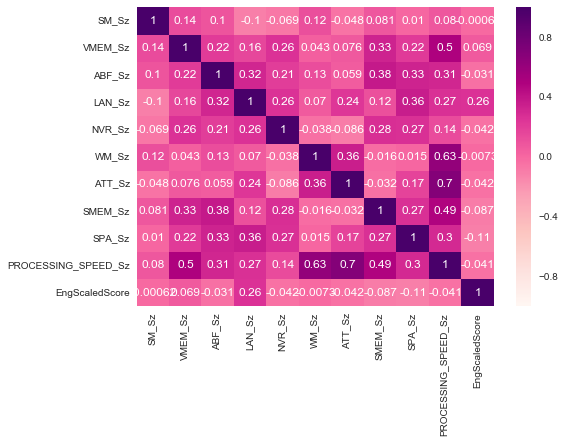

In [39]:
foo2 = mp.loc[:, mp.columns.str.contains('_Sz|EngScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

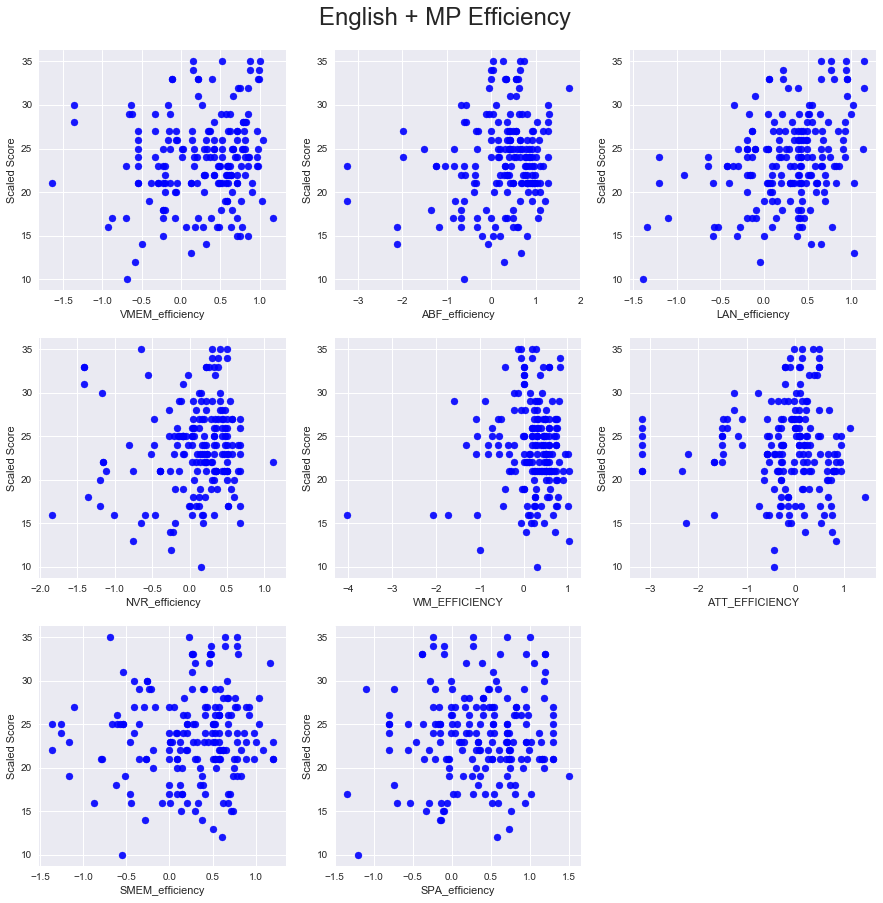

In [40]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# ENGLISH + EFFICIENCY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('English + MP Efficiency', fontsize=24, y=0.92)
y = mp.loc[:,'EngScaledScore']

x = mp.loc[:,'VMEM_efficiency']
ax1.scatter(x, y, c='blue', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_efficiency")

x = mp.loc[:,'ABF_efficiency']
ax2.scatter(x, y, c='blue', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_efficiency")

x = mp.loc[:,'LAN_efficiency']
ax3.scatter(x, y, c='blue', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_efficiency")

x = mp.loc[:,'NVR_efficiency']
ax4.scatter(x, y, c='blue', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_efficiency")

x = mp.loc[:,'WM_EFFICIENCY']
ax5.scatter(x, y, c='blue', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_EFFICIENCY")

x = mp.loc[:,'ATT_EFFICIENCY']
ax6.scatter(x, y, c='blue', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_EFFICIENCY")

x = mp.loc[:,'SMEM_efficiency']
ax7.scatter(x, y, c='blue', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_efficiency")

x = mp.loc[:,'SPA_efficiency']
ax8.scatter(x, y, c='blue', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_efficiency")

plt.show()

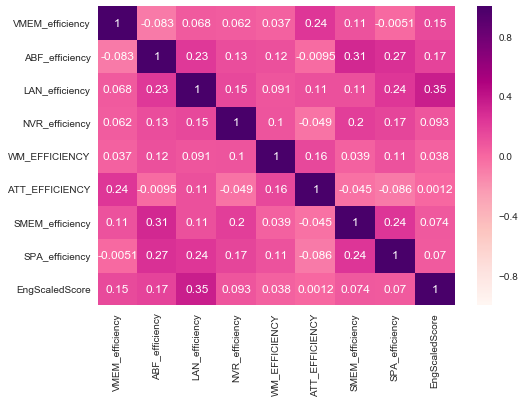

In [41]:
foo2 = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency|EngScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

# Tree Model

In [42]:
###### Plan ######
# Python doesn't allow for categorical variables 
# Start with accuracy and speed with the decision tree
# Figure out how many classes to separate the output
    # Nancy: start with 4 groups (below 20 , above 30, 2 classes in the 20s) overtime we want more fine grained bins
    

In [43]:
# Specify classes and tree depth
def stratify(x):
    if   x < 20:
        return 0
    elif x > 19 and x < 25:
        return 1
    elif x > 24 and x < 30:
        return 2
    elif x > 29:
        return 3
    else:
        return 4
    
tree_depth = 3

## Reading + Accuracy + Speed

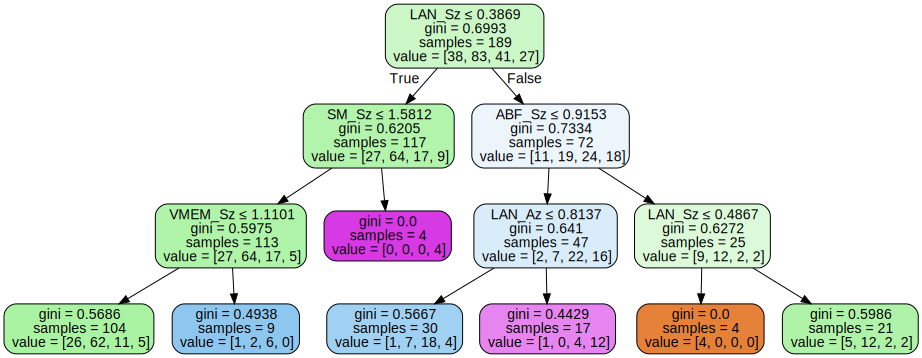

In [44]:
# Select input and output
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz')].copy()
y = scores.loc[:, 'ReadingScaledScore'].copy()

y_norm = y.apply(stratify)

# Build tree
foo = tree.DecisionTreeClassifier(max_depth=tree_depth)
foo = foo.fit(X, y_norm)
reading_az = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(reading_az)
graph

#### interpretation:


## Reading + Efficiency

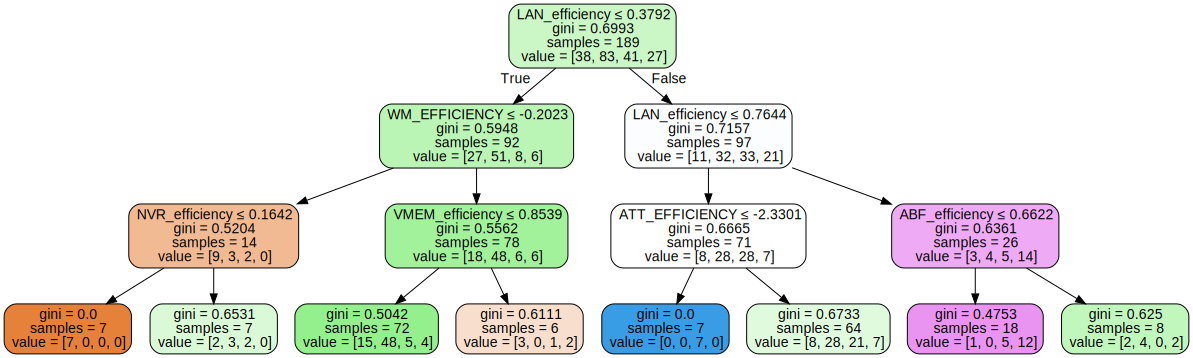

In [45]:
# Select input and output
X = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency')].copy()
y = scores.loc[:, 'ReadingScaledScore'].copy()

y_norm = y.apply(stratify)

# Build tree
foo = tree.DecisionTreeClassifier(max_depth=tree_depth)
foo = foo.fit(X, y_norm)
reading_ef = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(reading_ef)
graph

## Math + Accuracy + Speed

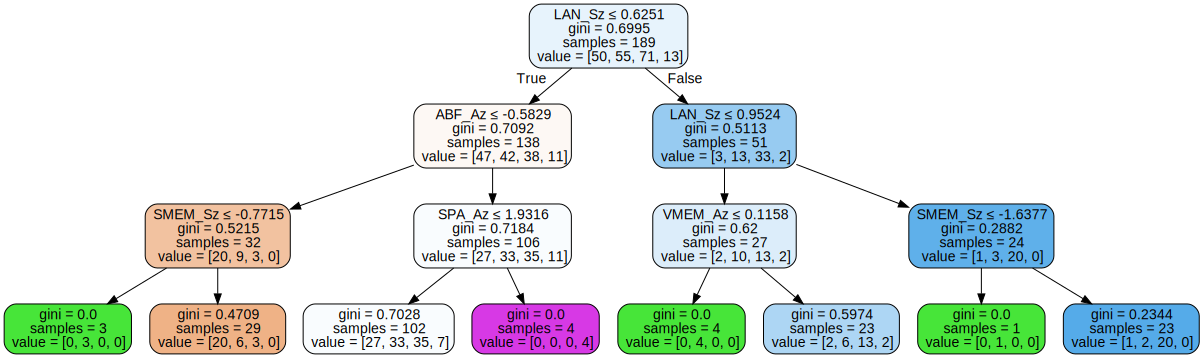

In [46]:
# Select input and output
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz')].copy()
y = scores.loc[:, 'MathScaledScore'].copy()

y_norm = y.apply(stratify)

# Build tree
foo = tree.DecisionTreeClassifier(max_depth=tree_depth)
foo = foo.fit(X, y_norm)
math_az = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(math_az)
graph

## Math + Efficiency

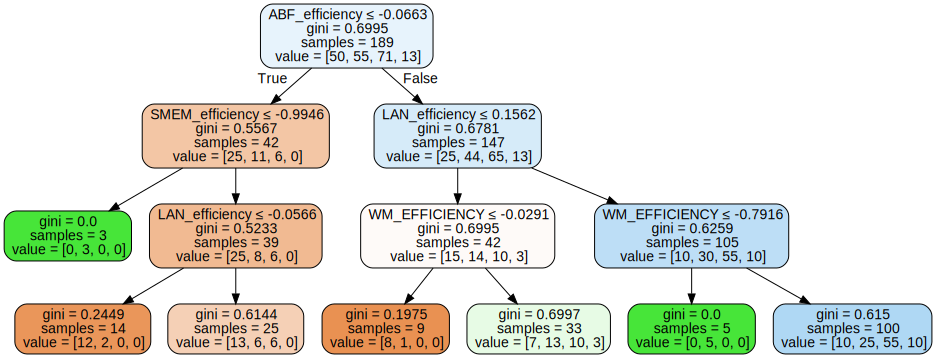

In [47]:
# Select input and output
X = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency')].copy()
y = scores.loc[:, 'MathScaledScore'].copy()

y_norm = y.apply(stratify)

# Build tree
foo = tree.DecisionTreeClassifier(max_depth=tree_depth)
foo = foo.fit(X, y_norm)
math_ef = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(math_ef)
graph

## Science + Accuracy + Speed

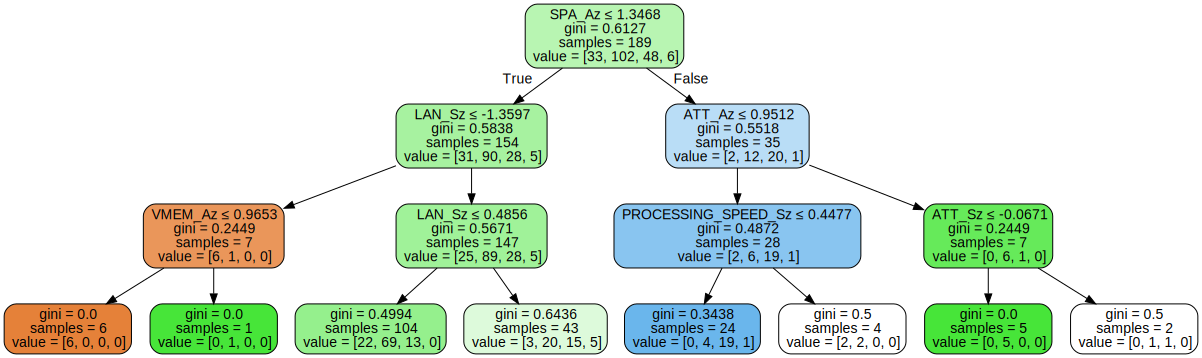

In [48]:
 # Select input and output
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz')].copy()
y = scores.loc[:, 'ScienceScaledScore'].copy()

y_norm = y.apply(stratify)

# Build tree
foo = tree.DecisionTreeClassifier(max_depth=tree_depth)
foo = foo.fit(X, y_norm)
science_az = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(science_az)
graph

## Science + Efficiency

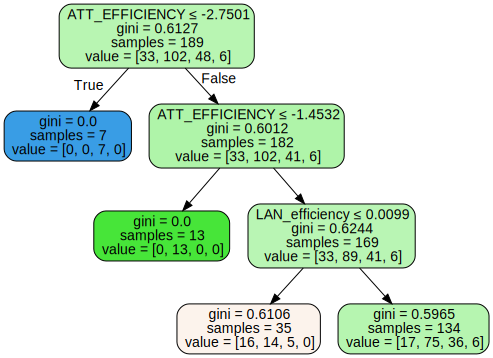

In [49]:
# Select input and output
X = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency')].copy()
y = scores.loc[:, 'ScienceScaledScore'].copy()

y_norm = y.apply(stratify)

# Build tree
foo = tree.DecisionTreeClassifier(max_depth=tree_depth)
foo = foo.fit(X, y_norm)
science_ef = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(science_ef)
graph

## English + Accuracy + Speed

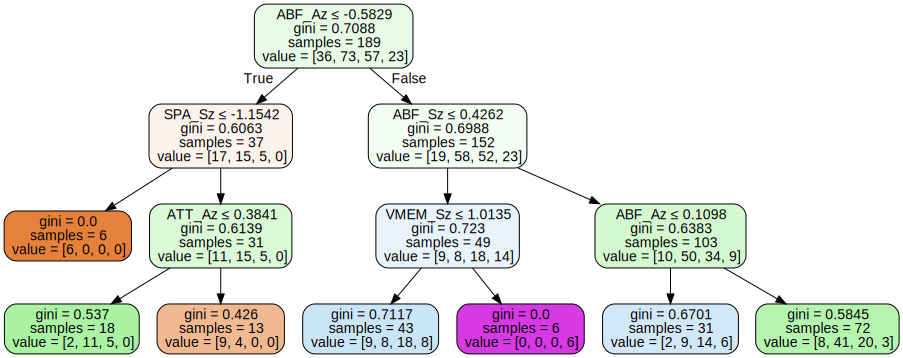

In [50]:
# Select input and output
X = mp.loc[:, mp.columns.str.contains('_Az|_Sz')].copy()
y = scores.loc[:, 'EngScaledScore'].copy()

y_norm = y.apply(stratify)

# Build tree
foo = tree.DecisionTreeClassifier(max_depth=tree_depth)
foo = foo.fit(X, y_norm)
eng_az = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(eng_az)
graph

## English + Efficiency

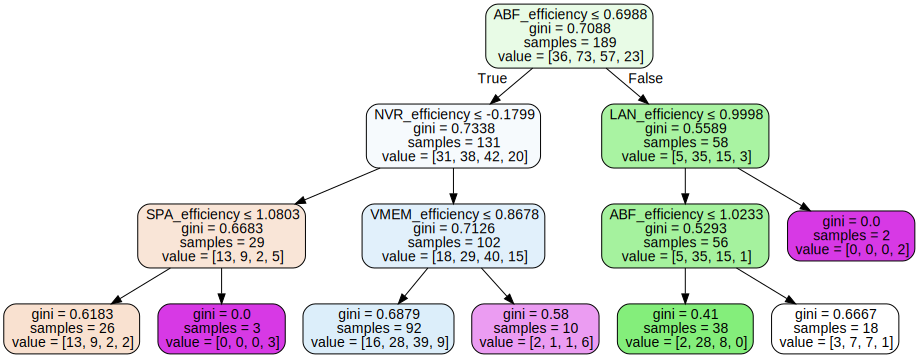

In [51]:
# Select input and output
X = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency')].copy()
y = scores.loc[:, 'EngScaledScore'].copy()

y_norm = y.apply(stratify)

# Build tree
foo = tree.DecisionTreeClassifier(max_depth=tree_depth)
foo = foo.fit(X, y_norm)
eng_ef = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(eng_ef)
graph